<a href="https://colab.research.google.com/github/Japh1234/Japh1234/blob/main/Basic_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Iris flower data set** or Fisher's Iris data set is a multivariate data set used and made famous by the British statistician and biologist **Ronald Fisher** in his 1936 paper.

It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.

Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

**The data set consists of 50 samples from each of three species of Iris**
* Iris setosa
* Iris virginica
* Iris versicolor \

**Four features** were measured(in centimeters) from each sample: \
* the length and the width of the sepals and petals.

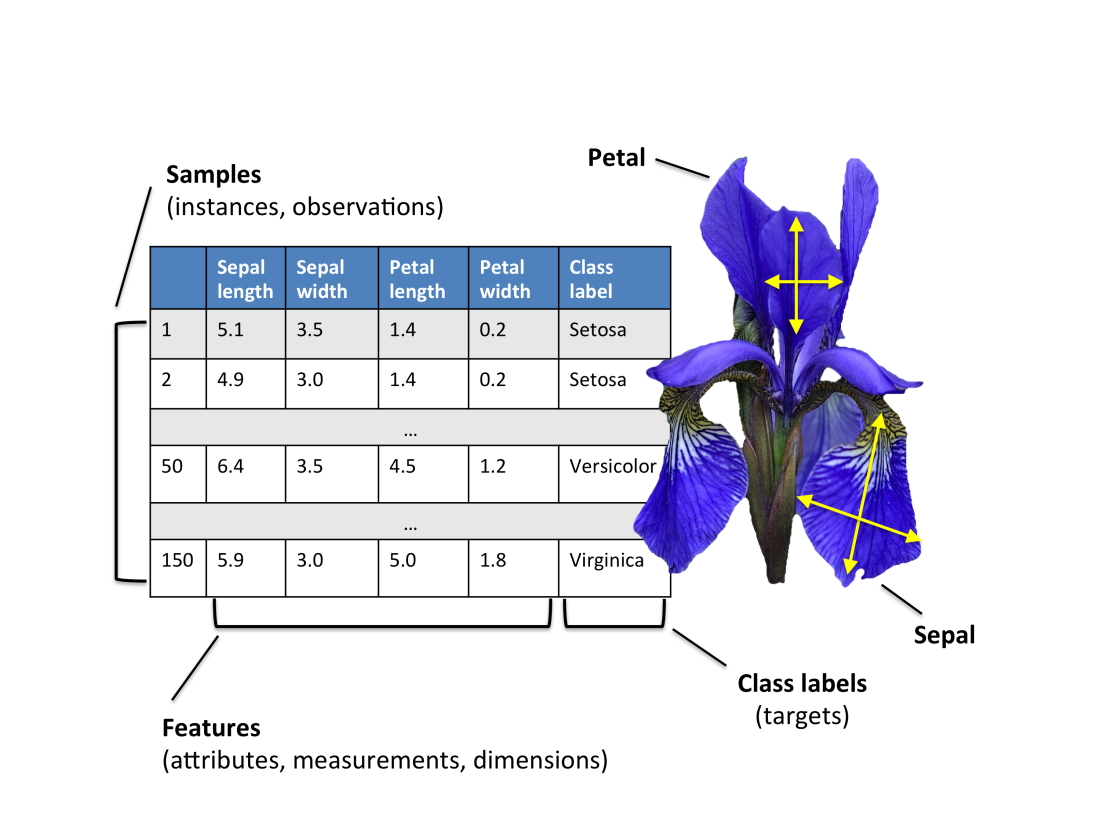
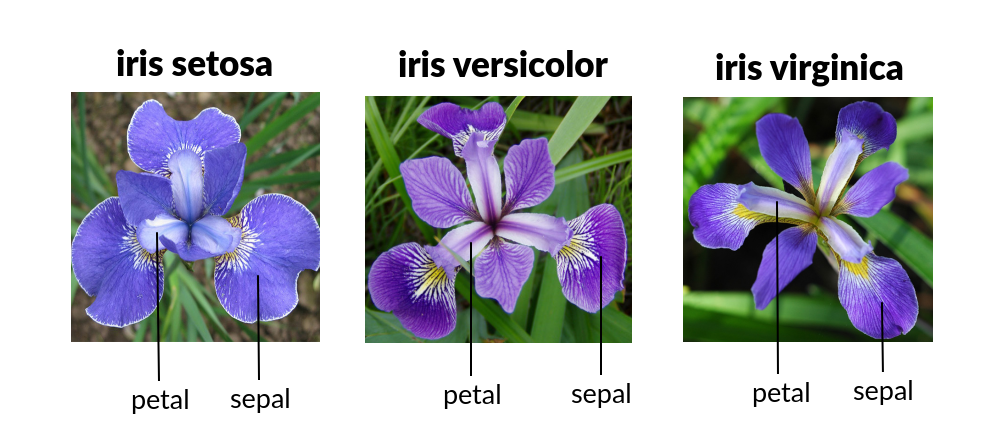

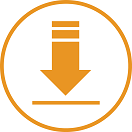


Download the Dataset: [Click Here](https://drive.google.com/file/d/1ndvS8IdKk2kRxQAhEAuua7s85lT9_6Cv/view?usp=sharing)

# **Creating a Dataframe**

In [ ]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.shape

(150, 7)

In [ ]:
df.shape # (rows, columns)

(150, 7)

* Check for missing values
* Explore **Imputation techniques**

In [ ]:
df.isnull().sum() # Check for missing values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
#Petals         0
#Sepals         0
dtype: int64

# **Organizing Data**

In [ ]:
df['sepal_length'].min(), df['sepal_length'].max()

(4.3, 7.9)

Calculate the class width:
[Online Tool](https://www.omnicalculator.com/statistics/class-width)

You need to know:
* Minimum value
* Maximum value
* No. of  Class intervals (Subjective)

Formula: \
$class\:width = (Max-Min)/n$

It is generally advised to have between 5 to 15 class intervals for optimal data representation. Should the frequencies within these intervals be low, it is recommended to combine them to ensure a more meaningful distribution.

**Optimal Number of Class intervals**:\
Utilizing **Sturges' rule** to determine the optimal number of bins or class intervals is crucial. With too few intervals, the frequency distribution becomes less informative. Conversely, too many bins can lead to an overly detailed frequency distribution, making data interpretation challenging.

Sturges' Formula: [Online Tool](https://allthingsstatistics.com/calculators/sturges-rule-calculator/)\
$Number\:of\:class\:intervals\:\::k=log_{2}(N) + 1.$ (log base 2)

Here, k denotes the optimal number of class intervals/bins and N denotes the total number of data values. If the value of k is a decimal fraction then it must be rounded up to the nearest integer value.

In [ ]:
import math

def generate_bins_and_labels(min_value, max_value, num_samples):
  """
  Generates bins and labels based on the min and max values and number of samples.

  Args:
    min_value: The minimum value of the data.
    max_value: The maximum value of the data.
    num_samples: The number of samples in the data.

  Returns:
    A tuple containing the bins and labels.
  """

  # Calculate the class width using Sturges' formula.
  num_intervals = math.ceil(math.log2(num_samples) + 1)
  # Calculate the class width.
  class_width = round((max_value - min_value) / num_intervals, 2)
  # Create the bins.
  bins = []
  for i in range(num_intervals + 1):
    bins.append(min_value + i * class_width)

  # Add 1 more class interval if the last bin value is equal to the max value.
  if bins[-1] == max_value:
    bins.append(max_value + class_width)

  # Create the labels.
  labels = []
  for i in range(len(bins) - 1):
    labels.append(f"[{bins[i]}, {bins[i + 1]})")

  return bins, labels

print(generate_bins_and_labels(df['sepal_length'].min(), df['sepal_length'].max(),150))

([4.3, 4.7, 5.1, 5.5, 5.9, 6.3, 6.7, 7.1, 7.5, 7.9, 8.3], ['[4.3, 4.7)', '[4.7, 5.1)', '[5.1, 5.5)', '[5.5, 5.9)', '[5.9, 6.3)', '[6.3, 6.7)', '[6.7, 7.1)', '[7.1, 7.5)', '[7.5, 7.9)', '[7.9, 8.3)'])


In [ ]:
# Create a frequency table
freq_table = df['species'].value_counts()
freq_table

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
# Discrete frequency distribution
freq_table = df['#Petals'].value_counts().sort_index()
freq_table

#Petals
3    40
4    28
5    44
6    38
Name: count, dtype: int64

In [ ]:
FOO = generate_bins_and_labels(df['sepal_length'].min(), df['sepal_length'].max(),150)
bins = FOO[0]
labels = FOO[1]

# Create the 'Petal_Length_Exclusive' column with exclusive intervals
df['sepal_bins'] = pd.cut(df['sepal_length'], bins=bins, labels=labels, right=False)

# Calculate the frequency of each class interval
freq_table = df['sepal_bins'].value_counts().sort_index()

# Print the frequency table
freq_table

sepal_bins
[4.3, 4.7)     9
[4.7, 5.1)    23
[5.1, 5.5)    20
[5.5, 5.9)    28
[5.9, 6.3)    19
[6.3, 6.7)    23
[6.7, 7.1)    16
[7.1, 7.5)     6
[7.5, 7.9)     5
[7.9, 8.3)     1
Name: count, dtype: int64

In [ ]:
df.iloc[12] # Access a specific row

sepal_length           4.8
sepal_width            3.0
petal_length           1.4
petal_width            0.1
species             setosa
#Petals                  3
#Sepals                  3
sepal_bins      [4.7, 5.1)
Name: 12, dtype: object

In [ ]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species  #Petals  \
0           5.1          3.5           1.4          0.2  setosa        4   
1           4.9          3.0           1.4          0.2  setosa        5   
2           4.7          3.2           1.3          0.2  setosa        5   
3           4.6          3.1           1.5          0.2  setosa        4   
4           5.0          3.6           1.4          0.2  setosa        3   

   #Sepals  
0        2  
1        5  
2        4  
3        4  
4        5

In [ ]:
df.drop('sepal_bins', axis=1, inplace=True) # Drop column by name

In [ ]:
df

sepal_length  sepal_width  petal_length  petal_width    species  #Petals  \
0             5.1          3.5           1.4          0.2     setosa        4   
1             4.9          3.0           1.4          0.2     setosa        5   
2             4.7          3.2           1.3          0.2     setosa        5   
3             4.6          3.1           1.5          0.2     setosa        4   
4             5.0          3.6           1.4          0.2     setosa        3   
..            ...          ...           ...          ...        ...      ...   
145           6.7          3.0           5.2          2.3  virginica        3   
146           6.3          2.5           5.0          1.9  virginica        5   
147           6.5          3.0           5.2          2.0  virginica        6   
148           6.2          3.4           5.4          2.3  virginica        5   
149           5.9          3.0           5.1          1.8  virginica        5   

     #Sepals  
0          2  
1          5  
2          4  
3          4  
4          5  
..       ...  
145        5  
146        2  
147        4  
148        3  
149        4  

[150 rows x 7 columns]

In [ ]:
df = df.drop(columns=df.columns[7:]) # Drop column by index
df.head()

sepal_length  sepal_width  petal_length  petal_width species  #Petals  \
0           5.1          3.5           1.4          0.2  setosa        4   
1           4.9          3.0           1.4          0.2  setosa        5   
2           4.7          3.2           1.3          0.2  setosa        5   
3           4.6          3.1           1.5          0.2  setosa        4   
4           5.0          3.6           1.4          0.2  setosa        3   

   #Sepals  
0        2  
1        5  
2        4  
3        4  
4        5

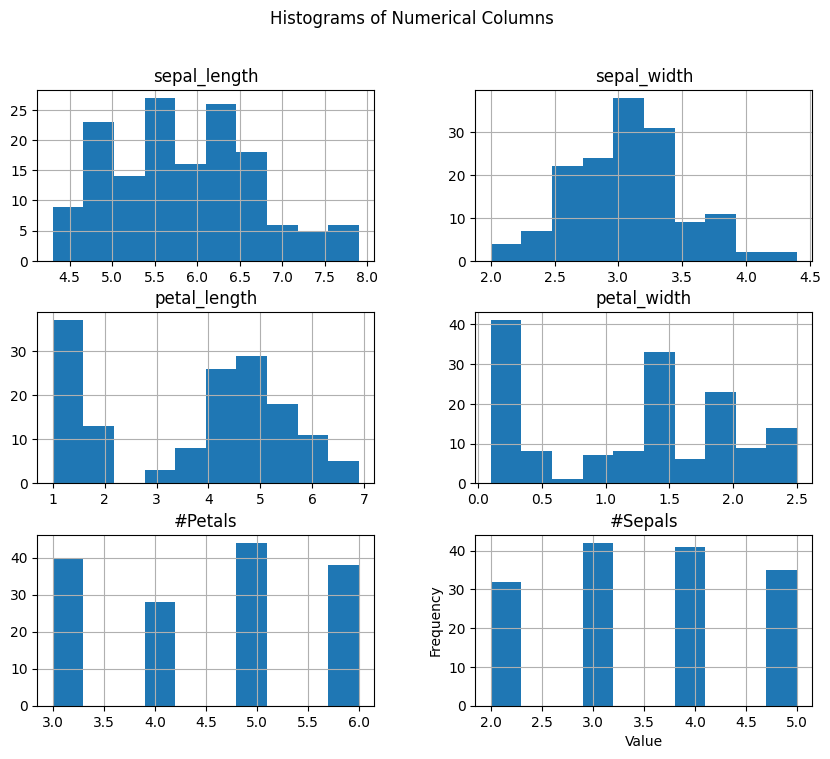

In [ ]:
import matplotlib.pyplot as plt

# Create histograms for each numerical column
df.hist(figsize=(10, 8), bins=10)

# Add titles and labels
plt.suptitle('Histograms of Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()


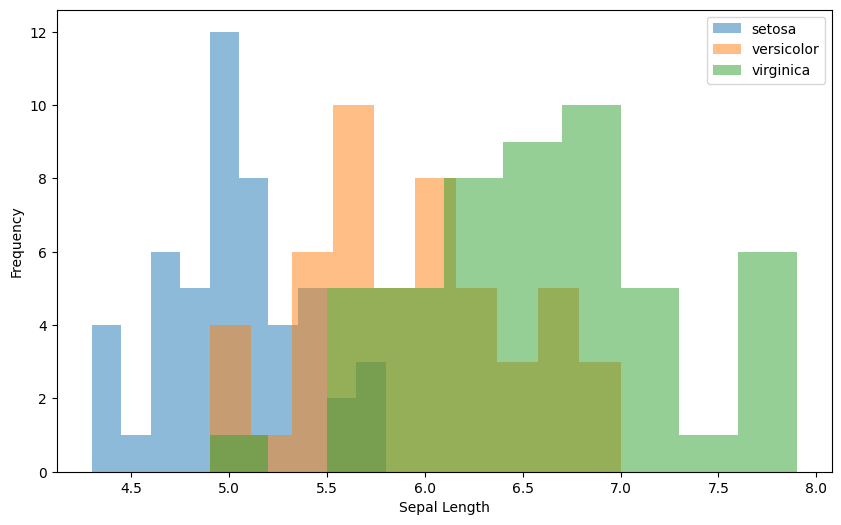

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram for each species
for species in df['species'].unique():
    df_subset = df[df['species'] == species]
    ax.hist(df_subset['sepal_length'], alpha=0.5, label=species)

# Add a legend and labels
ax.legend()
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


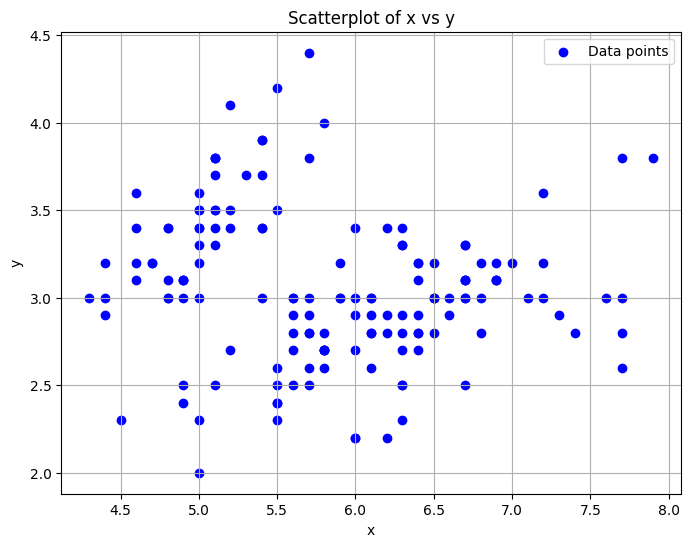

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['sepal_length'], df['sepal_width'], color='blue', label='Data points')
plt.title('Scatterplot of x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
correlation_matrix = np.corrcoef(df['sepal_length'], df['petal_length'])
correlation_coefficient = correlation_matrix[0, 1]

print(f'Correlation Coefficient between x and y: {correlation_coefficient}')


Correlation Coefficient between x and y: 0.8717541573048718


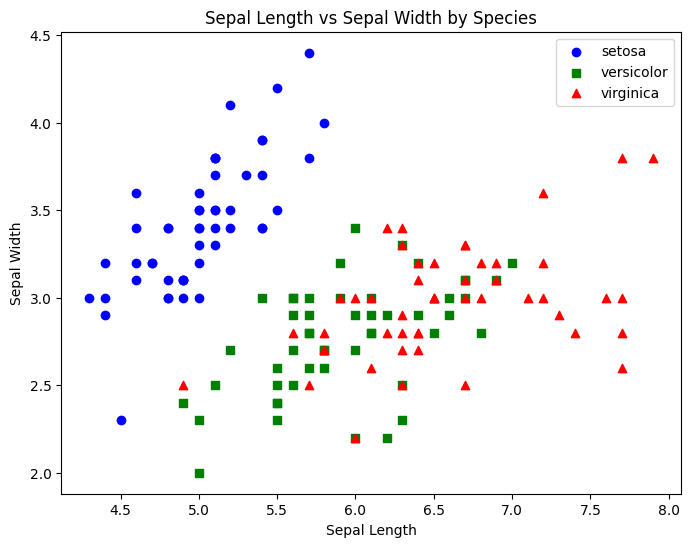

In [ ]:
colors = {'setosa': 'blue', 'versicolor': 'green', 'virginica': 'red'}
markers = {'setosa': 'o', 'versicolor': 's', 'virginica': '^'}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over each species and plot its data points
for species, group in df.groupby('species'):
    ax.scatter(group['sepal_length'], group['sepal_width'],
               color=colors[species], marker=markers[species], label=species)

# Add labels and title
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_title('Sepal Length vs Sepal Width by Species')

# Add legend
ax.legend()

# Show plot
plt.show()

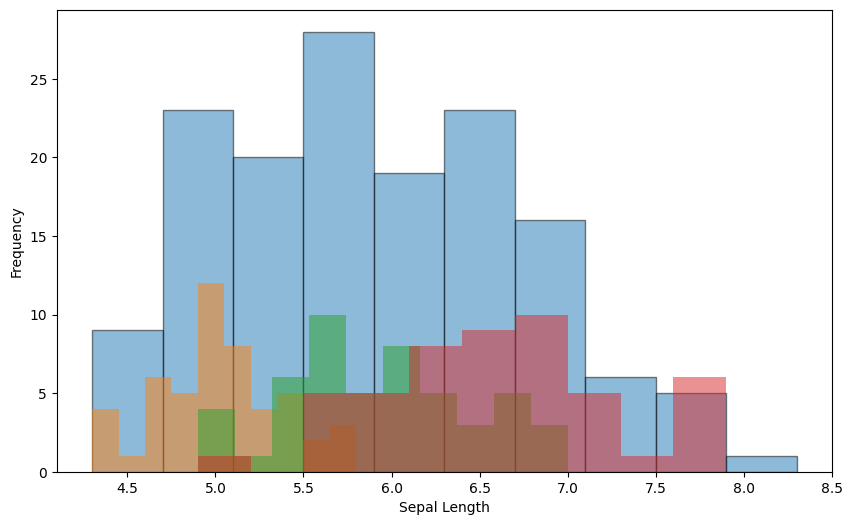

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

FOO = generate_bins_and_labels(df['sepal_length'].min(), df['sepal_length'].max(),150)
df_subset = df
ax.hist(df['sepal_length'], alpha=0.5, bins=FOO[0],edgecolor='black')


df_subset = df[df['species'] == 'setosa']
ax.hist(df_subset['sepal_length'], alpha=0.5)


df_subset = df[df['species'] == 'versicolor']
ax.hist(df_subset['sepal_length'], alpha=0.5)

df_subset = df[df['species'] == 'virginica']
ax.hist(df_subset['sepal_length'], alpha=0.5)


ax.set_xlabel('Sepal Length')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
!pip install stemgraphic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=701efefd34e48f23883921f37a1aba6d6939bf250c98d109a9feca9569b5c0a1
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


(<Figure size 750x175 with 1 Axes>, <Axes: >)

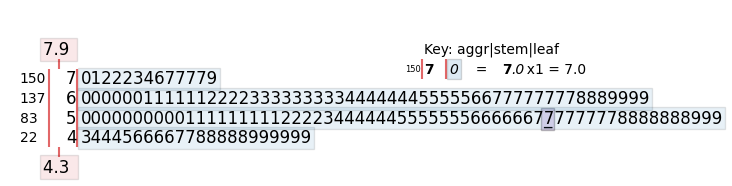

In [ ]:
import stemgraphic
stemgraphic.stem_graphic(df['sepal_length'], scale=1)

# Measures of Center and Variation

In [ ]:
from scipy import stats

# Calculate central tendencies
mean_sepal_length = df['sepal_length'].mean()
median_sepal_length = df['sepal_length'].median()
mode_sepal_length = stats.mode(df['sepal_length'])[0]

print("Mean:", mean_sepal_length)
print("Median:", median_sepal_length)
print("Mode:", mode_sepal_length)

Mean: 5.843333333333334
Median: 5.8
Mode: 5.0


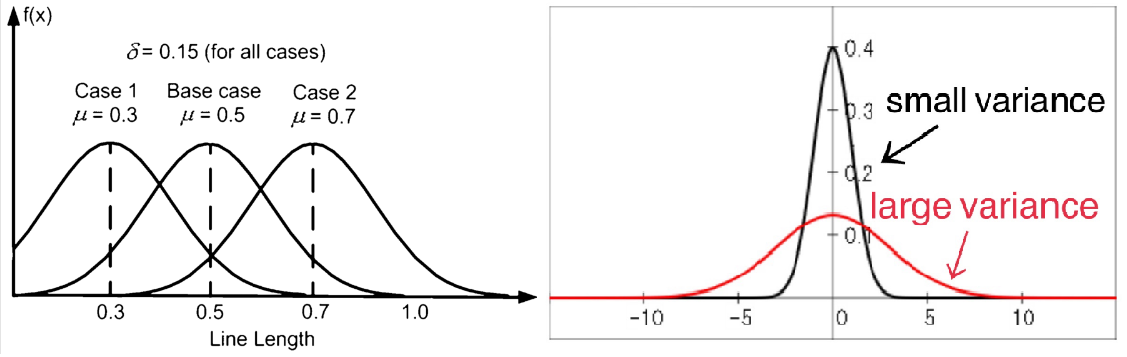

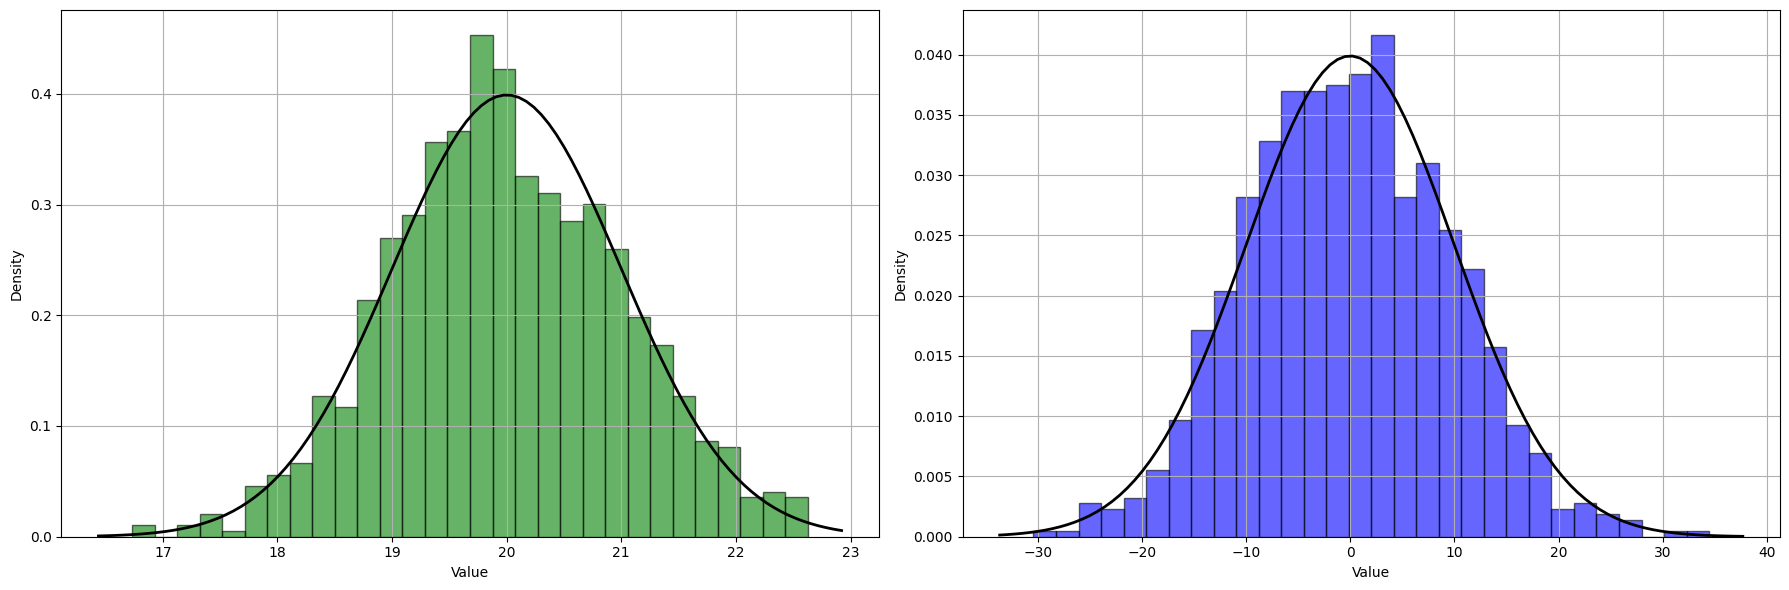

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two sets of normal distribution data
mean1, std_deviation1 = 20, 1
mean2, std_deviation2 = 0, 10
num_samples = 1000

data1 = np.random.normal(mean1, std_deviation1, num_samples)
data2 = np.random.normal(mean2, std_deviation2, num_samples)

# Plot the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the first normal distribution
ax1.hist(data1, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
xmin1, xmax1 = ax1.get_xlim()
x1 = np.linspace(xmin1, xmax1, 100)
p1 = np.exp(-0.5 * ((x1 - mean1) / std_deviation1)**2) / (std_deviation1 * np.sqrt(2 * np.pi))
ax1.plot(x1, p1, 'k', linewidth=2)
ax1.set_xlabel('Value')
ax1.set_ylabel('Density')
ax1.grid(True)

# Plot the second normal distribution
ax2.hist(data2, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
xmin2, xmax2 = ax2.get_xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = np.exp(-0.5 * ((x2 - mean2) / std_deviation2)**2) / (std_deviation2 * np.sqrt(2 * np.pi))
ax2.plot(x2, p2, 'k', linewidth=2)
ax2.set_xlabel('Value')
ax2.set_ylabel('Density')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Measures of shape

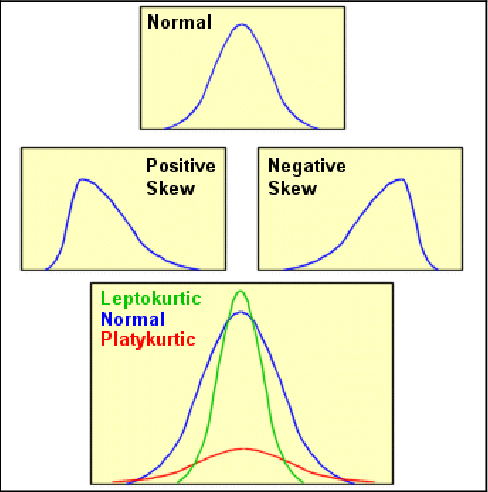

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis

# Calculate skewness
skewness = skew(df['sepal_length'])
print(f'Skewness: {skewness}')

# Calculate kurtosis
kurt = kurtosis(df['sepal_length'])
print(f'Kurtosis: {kurt}')


Skewness: 0.3117530585022963
Kurtosis: -0.5735679489249765


Why we are doing this?

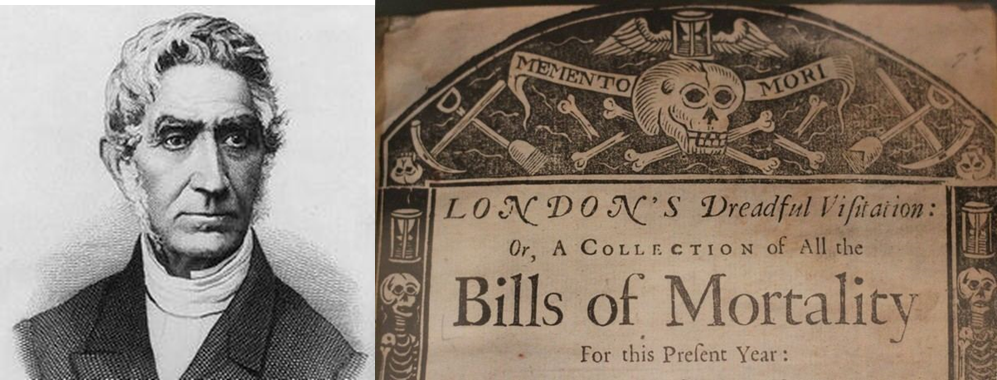

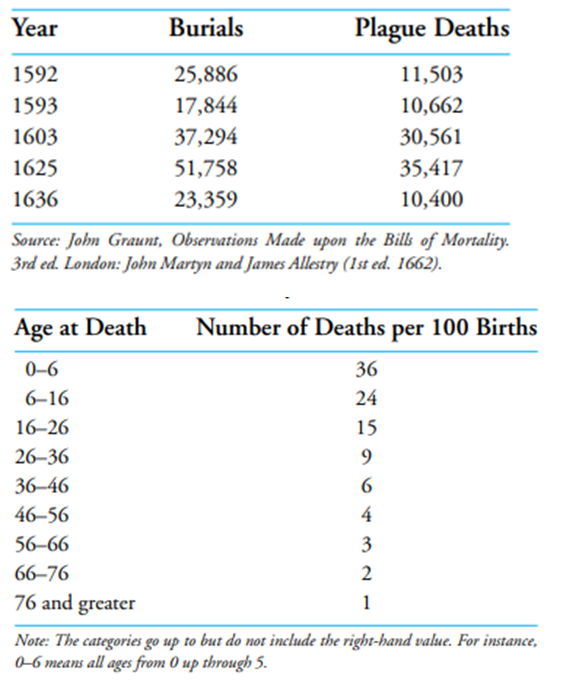

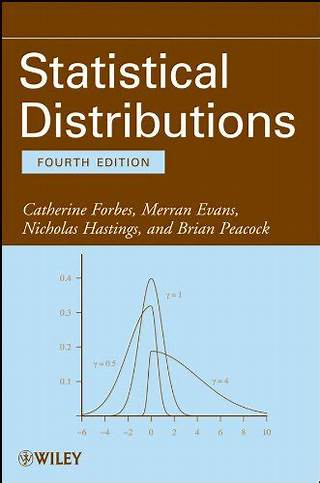

# Flying Bombs - R.D clarke

# Motivation For inferential Statistics

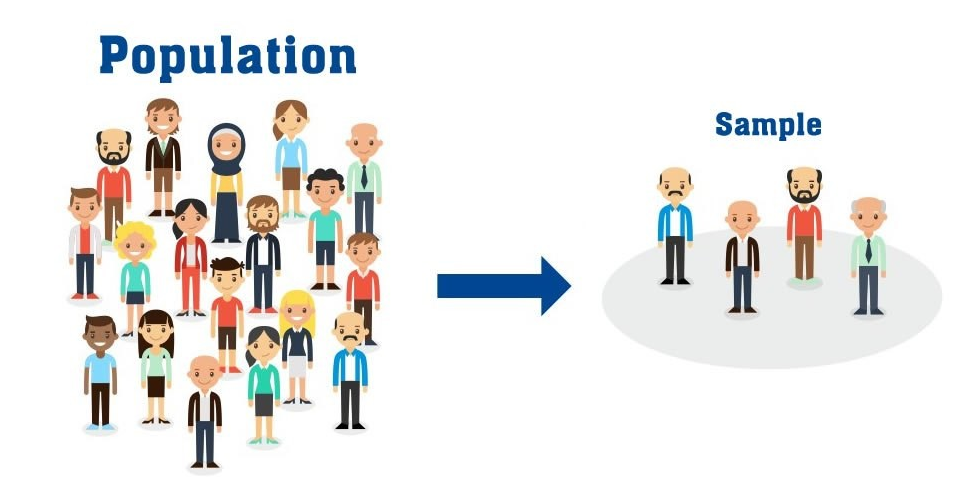

* **A parameter** is a number that describes some characteristic of a population.
* **A statistic** is a number that describes some characteristic of a sample.



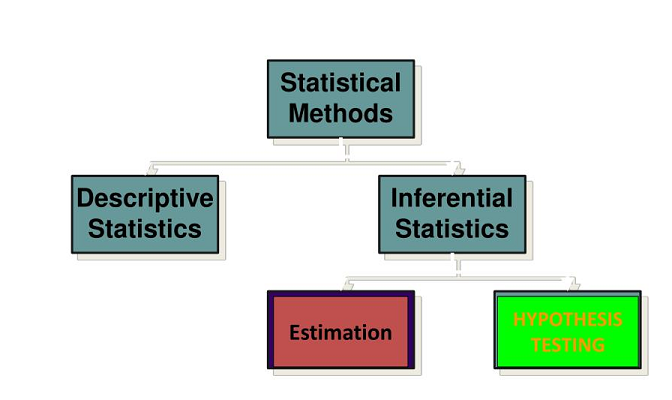

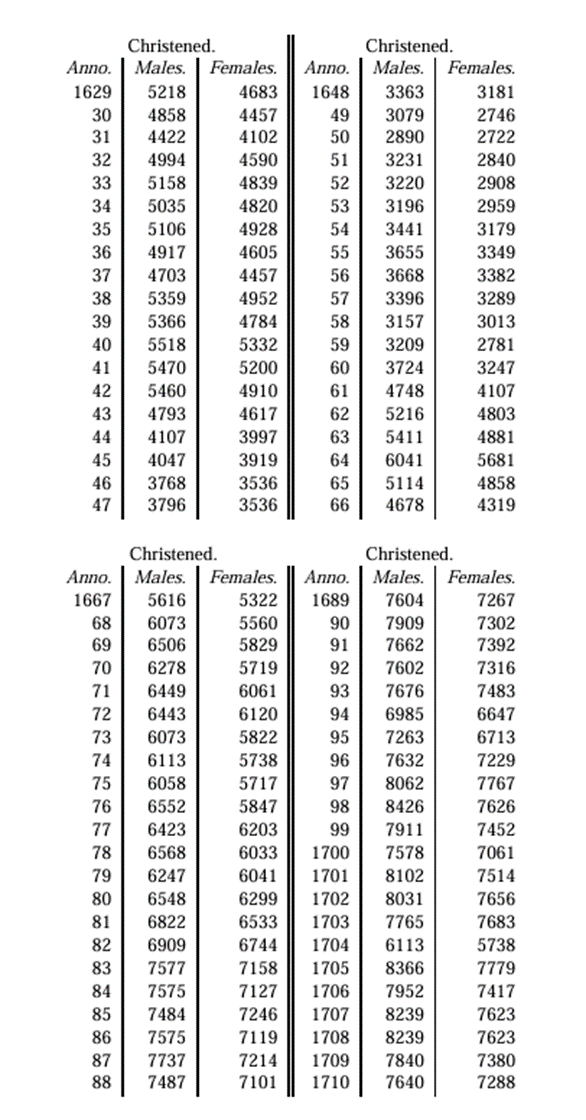

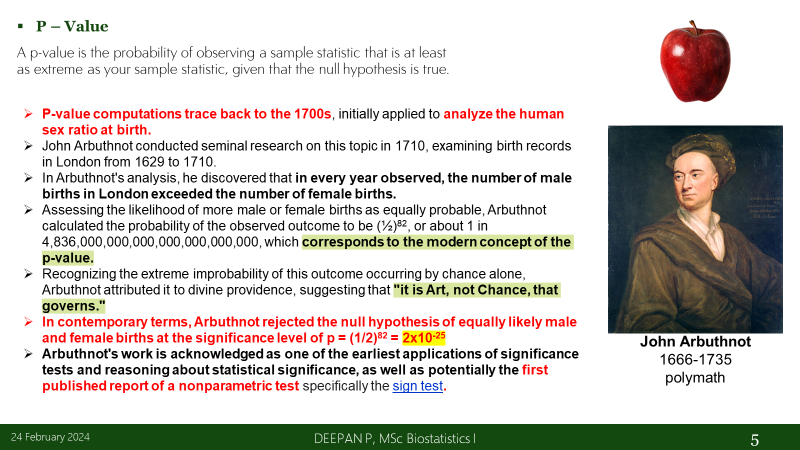

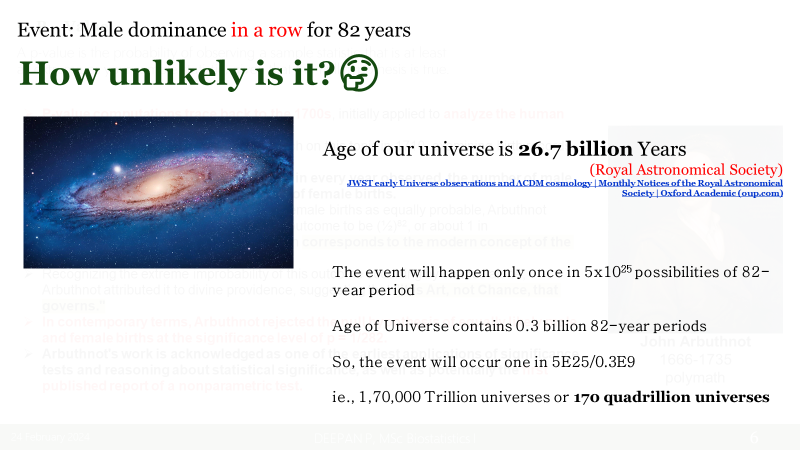

In [ ]:
s = 'Hello'
print(type(s))

<class 'str'>


In [ ]:
type(df)

pandas.core.frame.DataFrame